In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Loading the dataset and looking at its main features and renaming.

In [2]:
customer_df = pd.read_csv('/Users/cillian/Desktop/Ironhack/Ironhack-unit-4/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ","_")
customer_df = customer_df.rename(columns={ 'customer': 'customer_id','employmentstatus' : 'employment_status'})
customer_df.head()

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## Fixing the data types into the most appropriate type and plotting the correlation matrix

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df = customer_df.set_index('customer_id')
# Other than effective_to_date which I changed to datetime format i dont see any other column that would benefit us
# in a different type.

- Other than effective_to_date which I changed to datetime format I dont see any other column that would benefit us in a different type.

In [21]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [8]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

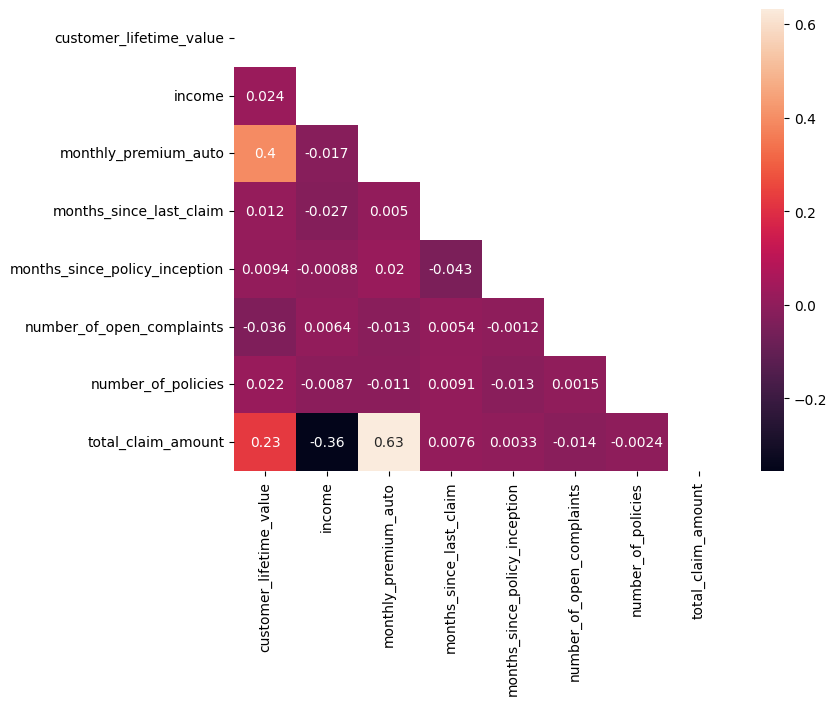

In [9]:
num_col = customer_df.select_dtypes(include='number')

corr_matrix = num_col.corr(method = 'pearson')

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

### Correlation matrix comments.
- In the majority of numerical columns there is minute postive and negative correlation, but no high level of corr.
- There is .63 correlation between total_claim_amount and monthly_premium_auto which in auto insurance where the highe the claim the higher the premium would make sense.
-  Positive correlation of .4 is seen between customer_lifetime_value and monthly_premium_auto which makes sense if the customer's premium is higher than so is their value.
- Negative correlation of -.36 which shows that the lower the customer's income the higher the claim usually and vice versa.   

## Plotting the continous variables

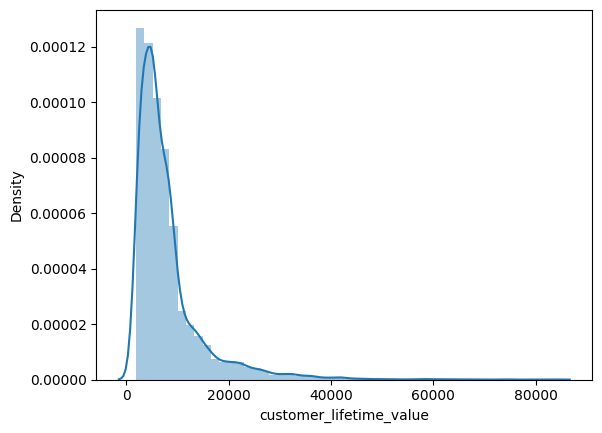

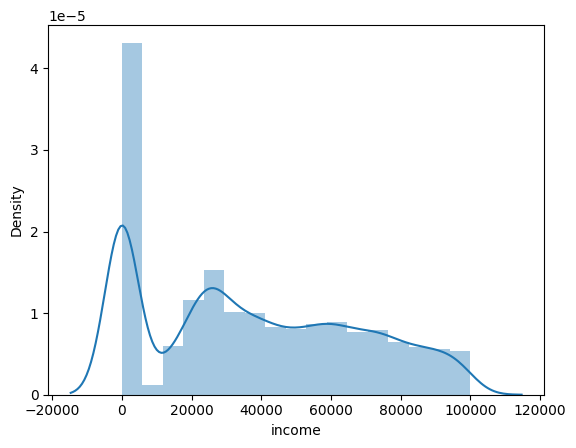

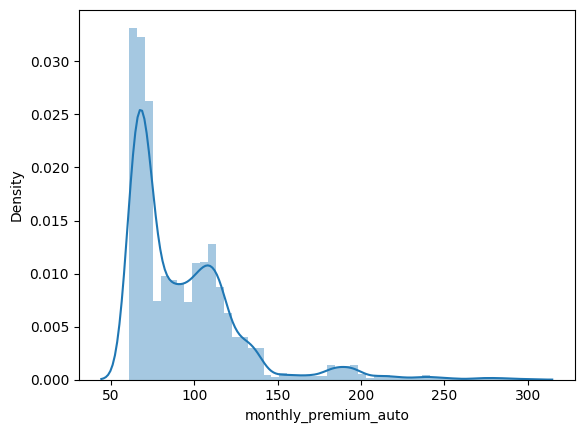

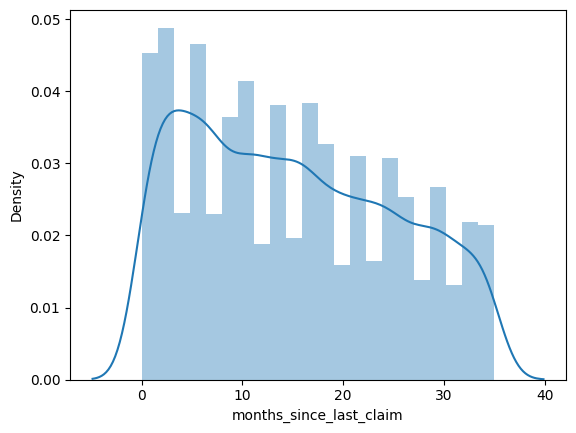

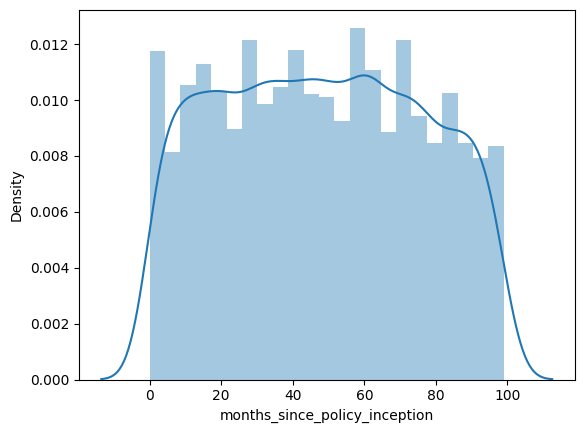

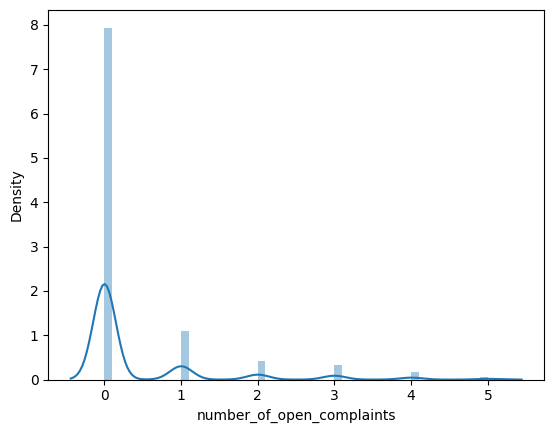

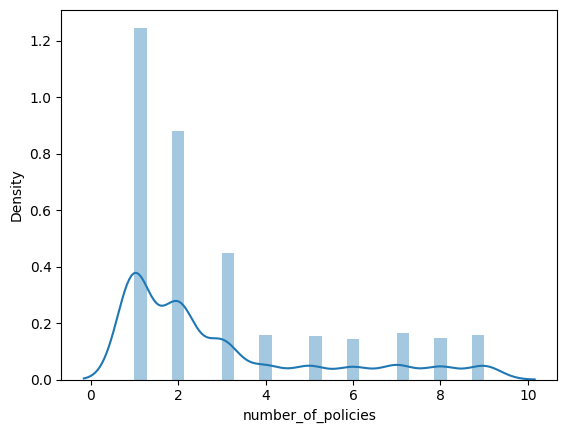

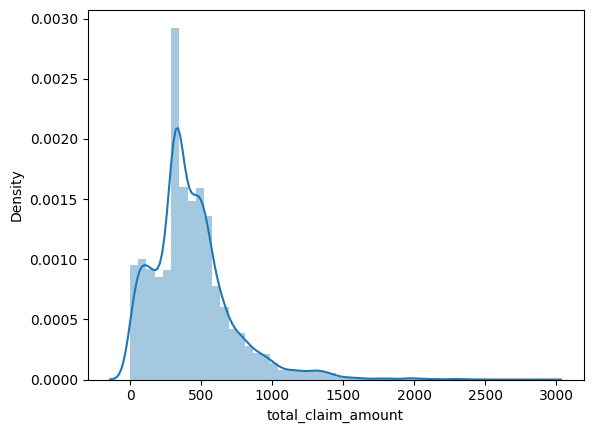

In [10]:
for col in num_col.columns:
    sns.distplot(num_col[col])
    plt.show()

### Insights :
- The columns customer_lifetime_value, income and total_claim_amount show a normal distribution when considering monetary values with a skew to the right. However in income we have a spike at 0 telling us a considerable amount of our customers have 0 income.
- months_since_last_claim and months_since_policy_inception show normal distribution, also with number_of_open_complaints and number_of_policies considering the values they represent.

### Plotting the categorical columns.

In [11]:
cat_col = customer_df.select_dtypes('object')

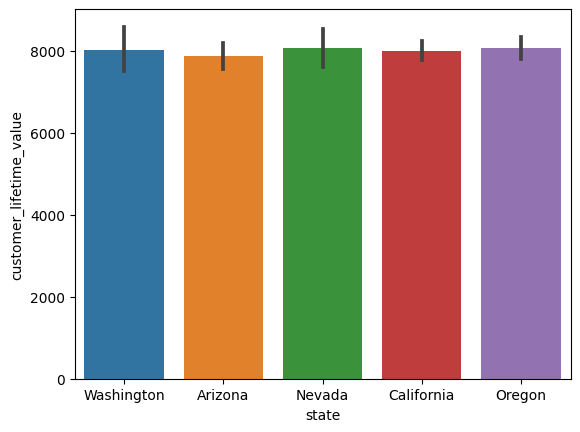

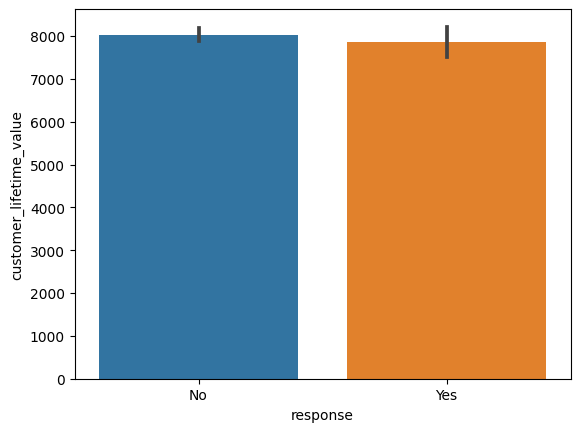

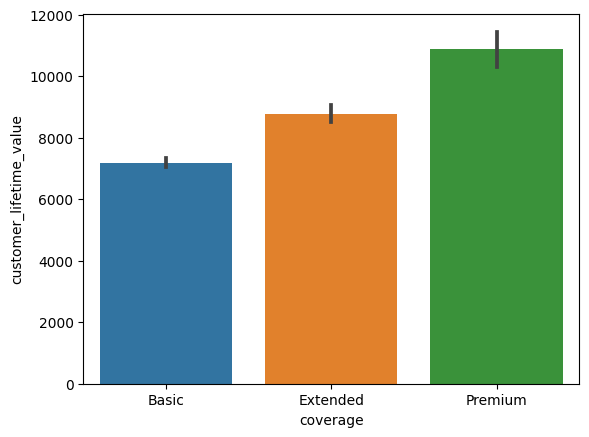

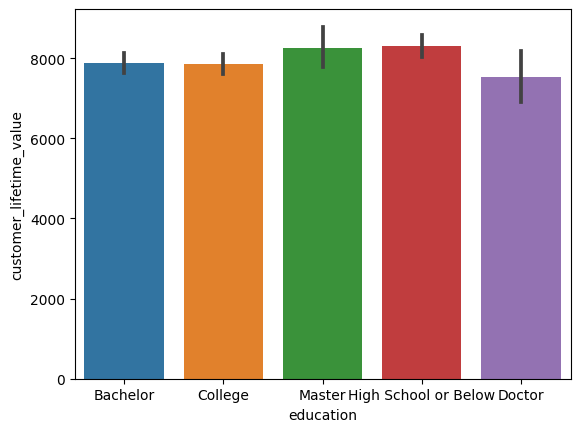

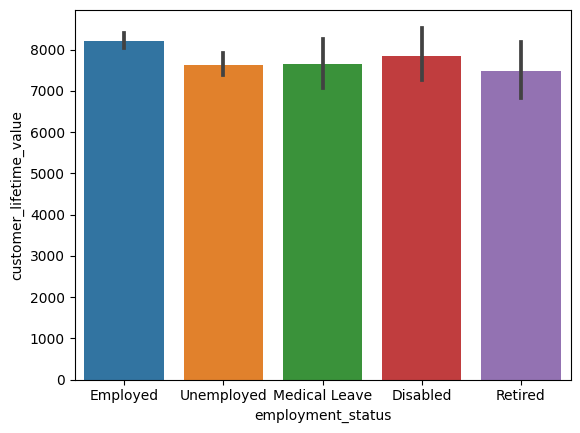

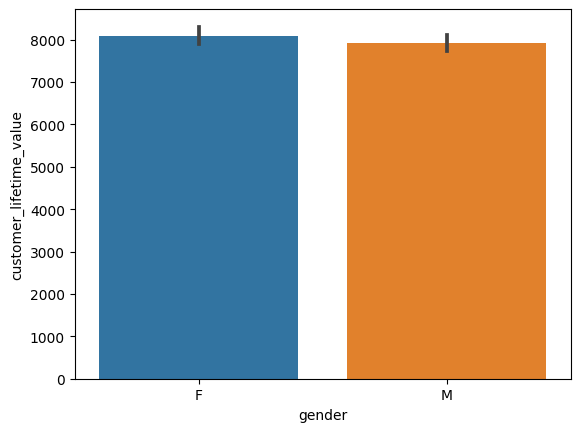

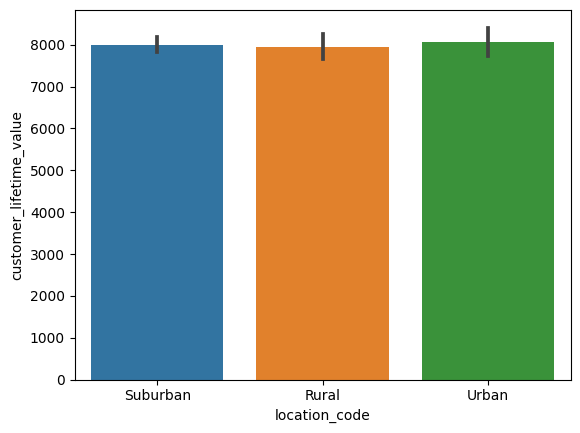

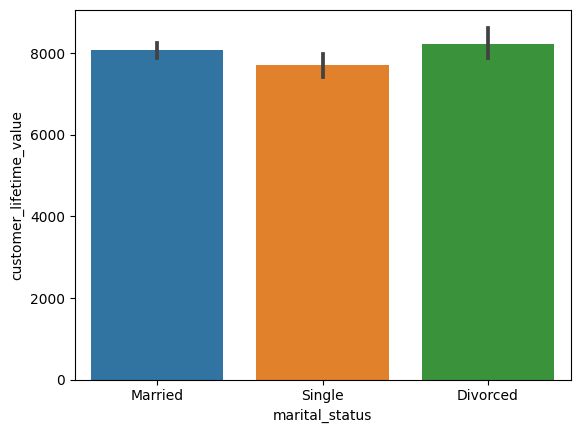

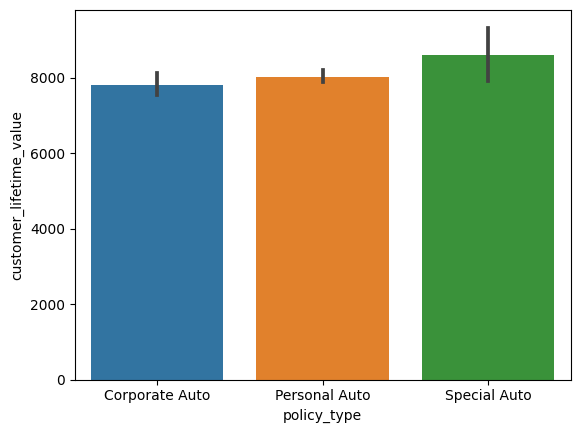

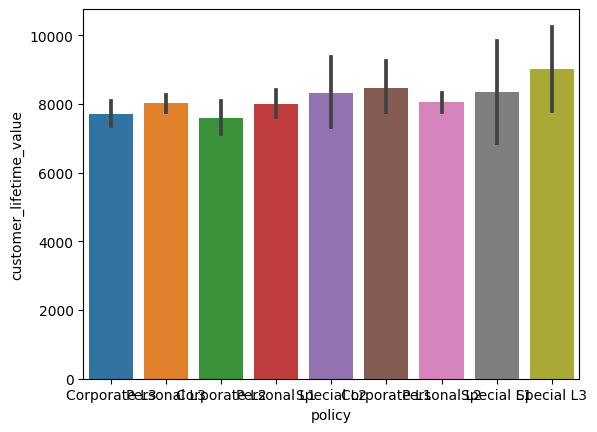

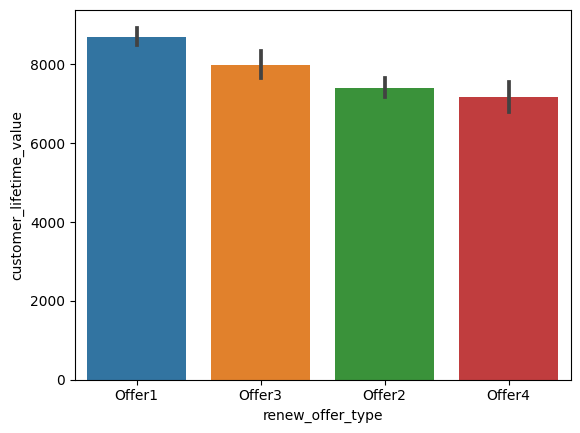

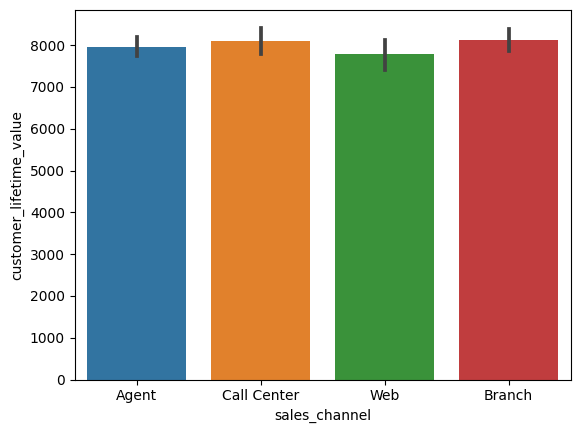

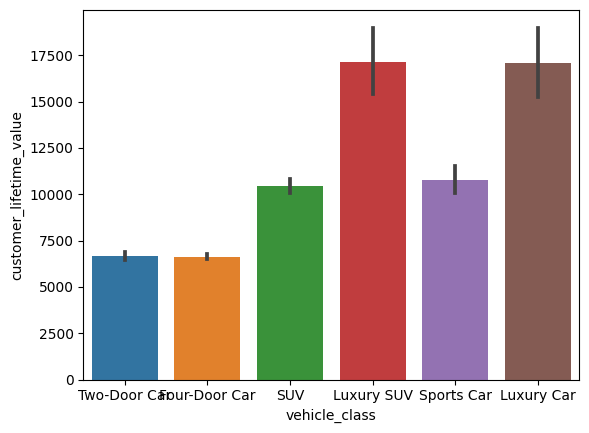

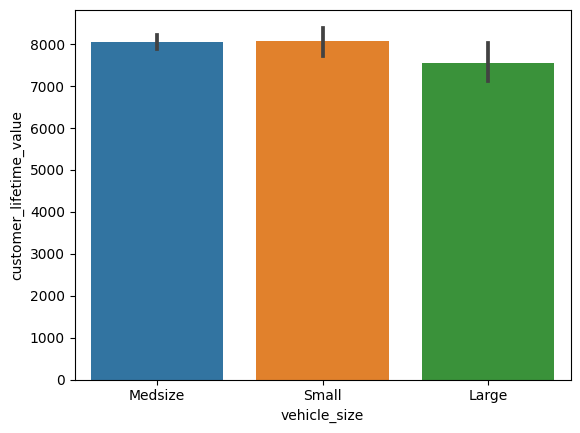

In [12]:
for col in cat_col:
    sns.barplot(x=cat_col[col], y= 'customer_lifetime_value', data= customer_df)
    plt.show()

### Results:
- I previously select customer_ID as the index for the dataframe.
- I choose customer_lifetime_value to plot against my categorical columns.
- We see even distribution in most graphs with some intresting insights.
- Larger value in policy_type starting from Corporate, Personal and Special.
- Luxury SUV and Luxury Car in vehicle_class impacting positivly the customer_lifetime_value, which makes sense as these vehicles cost a lot more and can range in value too as we see in the outliers aswell.

### Looking for outliers in the continuous variables.

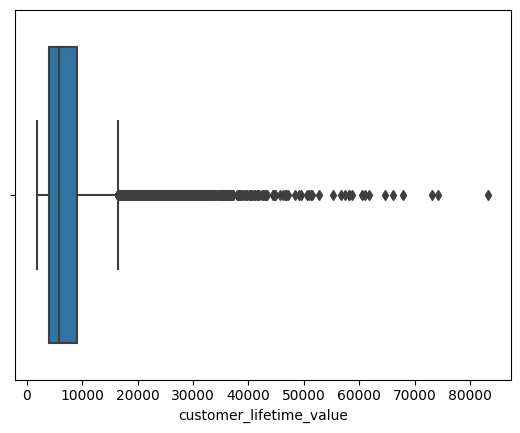

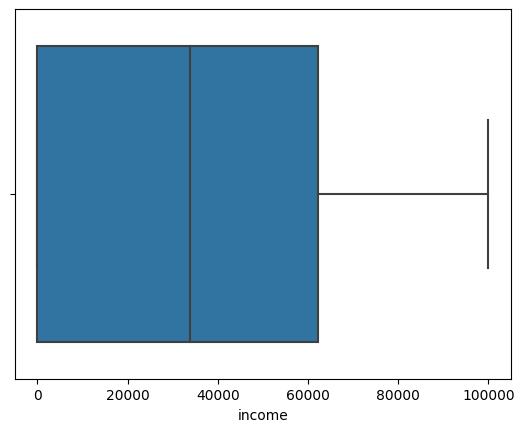

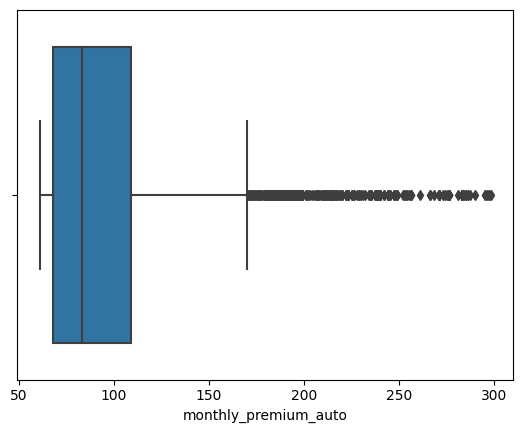

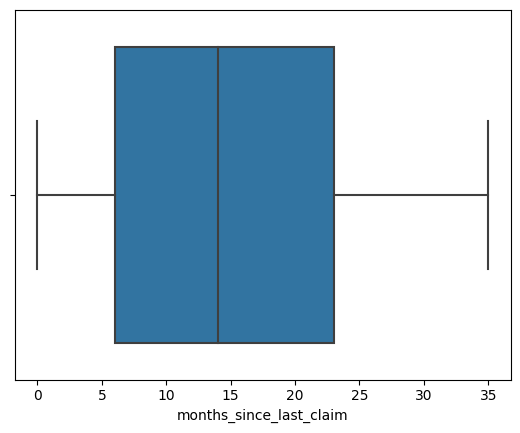

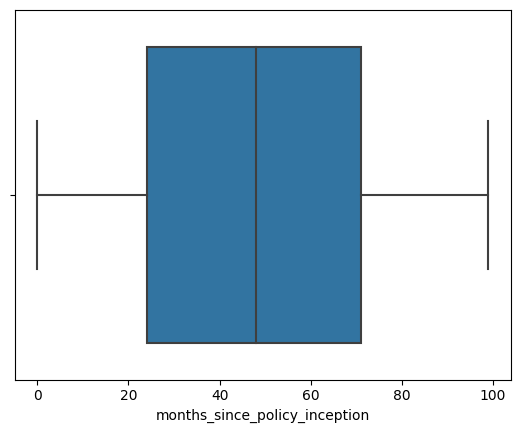

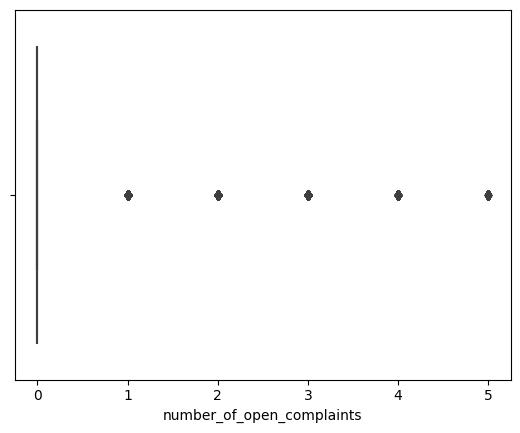

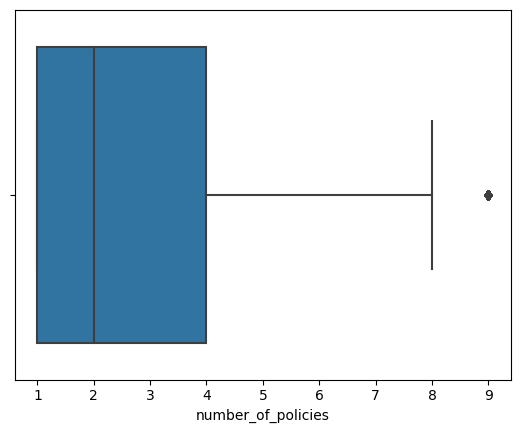

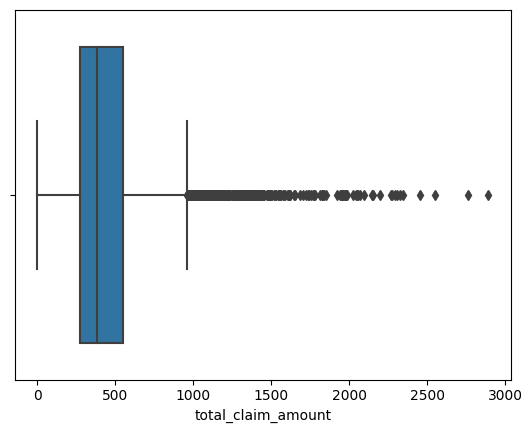

In [13]:
for col in num_col.columns:
    sns.boxplot(x=num_col[col])
    plt.show()

- Outliers are seen in mostly in customer_life_time_value, monthly_premium_auto and total_claim_amount which when considering these are monetary values it is usual to see.

### Checking NaNs.

In [14]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64